In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1

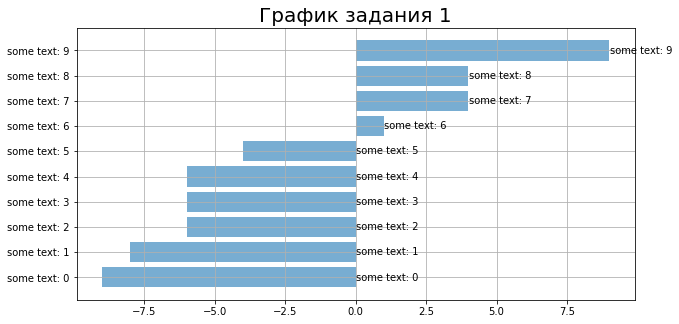

In [11]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
plt.figure(figsize = (10, 5))
rect1=plt.barh(np.arange(0, 10, 1),bars_length,alpha=0.6)
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
plt.yticks(np.arange(0, 10, 1),yticks_labels)
ax = plt.gca()
ax.set_title('График задания 1', fontsize=20)
ax.set_yticklabels(labels)
for i in range(len(bars_length)):
    if bars_length[i]>0:
        ax.text(bars_length[i]+0.01, i , labels[i], color='black', va='center', fontsize=10)
    else:
        ax.text(0.01, i , labels[i], color='black', va='center', fontsize=10)
plt.grid(True)
plt.show()

# Задание 2

In [15]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

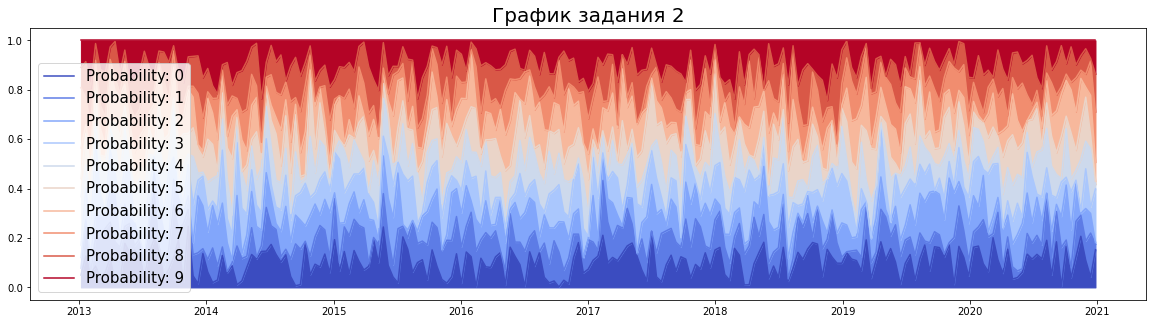

In [16]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    ax = plt.gca()
    cmap = plt.cm.coolwarm(np.linspace(0, 1, 10))
    
    lower_topic = probabilities_in_time[0]
    plt.plot(lower_topic, color = cmap[0], label = "Probability: "+str(0))
    plt.fill_between(probabilities_in_time.index,  lower_topic, color = cmap[0]) # заполняем цветом
    
    for i  in range(1,10):
        upper_topic = lower_topic + probabilities_in_time[i]
        
        plt.plot(upper_topic, color = cmap[i], label = "Probability: "+str(i))
        plt.fill_between(probabilities_in_time.index, lower_topic,upper_topic, color = cmap[i]) # заполняем цветом
        
        lower_topic = upper_topic
    
    
    plt.legend(loc='lower left', prop={'size':15})
    plt.title('График задания 2', fontsize=20)
    plt.show()

plot_time_probabilities(probabilities_in_time, figsize)

# Задание 3

In [18]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

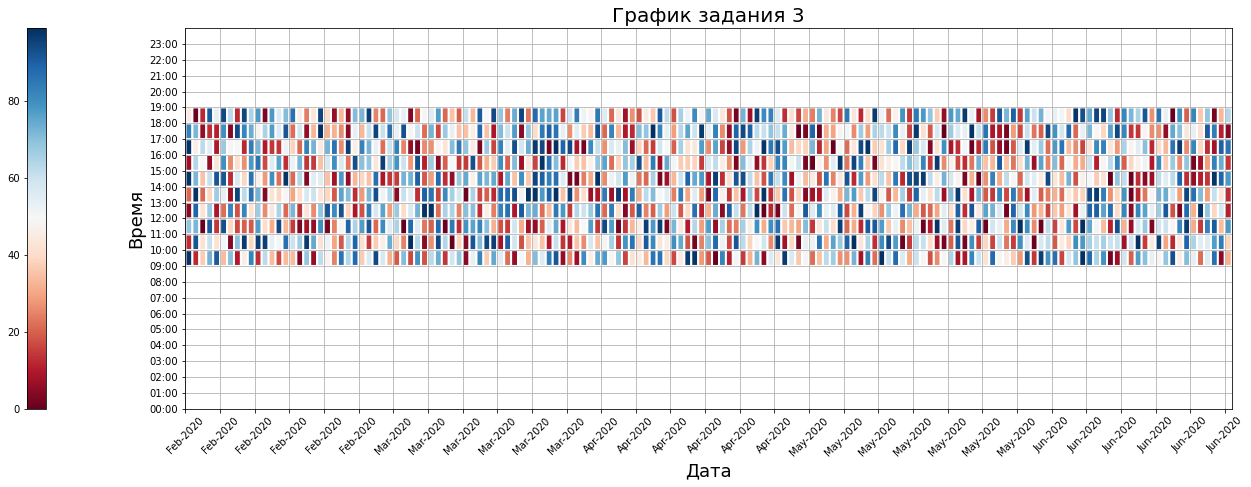

In [19]:
def plot_intraday_ts(intraday_ts, figsize):
    df = np.array(intraday_ts)
    df = df[:-1].reshape(int((3625-1)/24),24)
    df = df.T
    cmap = plt.cm.coolwarm(np.linspace(0, 1, 100))
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    c= ax.pcolor(df, cmap='RdBu',edgecolors='white', linewidths=2)
    plt.grid(True)

    plt.ylabel('Время', fontsize=18)
    plt.xlabel('Дата', fontsize=18)
    
        
    cb = plt.colorbar(c ,ax = [ax], location = 'left')
    frequency = 5
    plt.xticks(np.arange((3625-1)/24)[::frequency], pd.date_range('2020-02-01', '2020-07-01', freq='D')[:-1][::frequency].strftime('%b-%Y'),rotation=45)
    plt.yticks(np.arange(24), [ str(i).rjust(2,'0') + ':00' for i in np.arange(24)])
   
    plt.title('График задания 3', fontsize=20)
    plt.show()
    

plot_intraday_ts(intraday_ts, figsize)